In [ ]:
import numpy as np
import matplotlib.pyplot as plt


sinogram = np.load('/home/mhb0917/의료영상처리/202255646/sinogram.npy')  # (512, 180)
print("Sinogram shape:", sinogram.shape)


angles = np.linspace(1, 180, sinogram.shape[1], endpoint=True)
print("Angles shape:", angles.shape)
print("Angles (first 5):", angles[:5])


Sinogram shape: (512, 180)
Angles shape: (180,)
Angles (first 5): [1. 2. 3. 4. 5.]


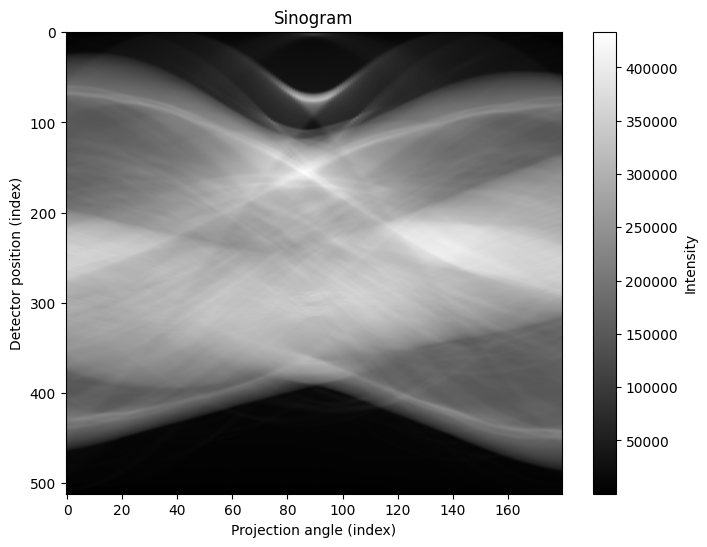

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(sinogram, cmap='gray', aspect='auto')
plt.title("Sinogram")
plt.xlabel("Projection angle (index)")
plt.ylabel("Detector position (index)")
plt.colorbar(label='Intensity')
plt.show()


In [ ]:
from scipy.ndimage import rotate

def back_projection(sinogram, angles):
    n = sinogram.shape[0]
    recon = np.zeros((n, n))  
    
    for i, angle in enumerate(angles):
        projection = np.tile(sinogram[:, i], (n, 1)) 
        rotated = rotate(projection, angle, reshape=False)
        recon += rotated  
    
    return recon


In [ ]:
from scipy.fftpack import fft, ifft, fftfreq

def filtered_back_projection_RamLak(sinogram, angles):
    n = sinogram.shape[0]
    
    #filter 생성
    freqs = fftfreq(n).reshape(-1, 1)
    filter = 2 * np.abs(freqs)
    
    # 필터 적용
    sinogram_fft = fft(sinogram, axis=0)
    filtered_sino = np.real(ifft(sinogram_fft * filter, axis=0))
    
    # 역투영
    recon = np.zeros((n, n))
    for i, angle in enumerate(angles):
        projection = np.tile(filtered_sino[:, i], (n, 1))
        rotated = rotate(projection, angle, reshape=False)
        recon += rotated
    
    return recon


In [ ]:
from scipy.fftpack import fft, ifft, fftfreq
import numpy as np
from scipy.ndimage import rotate

def filtered_back_projection_gaussian(sinogram, angles, sigma=0.05):
    n = sinogram.shape[0]
    
    #filter 생성
    freqs = fftfreq(n).reshape(-1, 1)
    filter = np.exp(-(freqs**2) / (2 * sigma**2))
    
    #필터 적용
    sinogram_fft = fft(sinogram, axis=0)
    filtered_sino = np.real(ifft(sinogram_fft * filter, axis=0))
    
    #역투영
    recon = np.zeros((n, n))
    for i, angle in enumerate(angles):
        projection = np.tile(filtered_sino[:, i], (n, 1))
        rotated = rotate(projection, angle, reshape=False)
        recon += rotated
    
    return recon


In [ ]:
def filtered_back_projection_hamming(sinogram, angles):
    n = sinogram.shape[0]
    
    #filter 생성
    freqs = fftfreq(n).reshape(-1, 1)
    filter = 2 * np.abs(freqs) * (0.54 + 0.46 * np.cos(2 * np.pi * freqs / np.max(freqs)))
    
    #필터 적용
    sinogram_fft = fft(sinogram, axis=0)
    filtered_sino = np.real(ifft(sinogram_fft * filter, axis=0))
    
    #역투영
    recon = np.zeros((n, n))
    for i, angle in enumerate(angles):
        projection = np.tile(filtered_sino[:, i], (n, 1))
        rotated = rotate(projection, angle, reshape=False)
        recon += rotated
    
    return recon


In [ ]:
def filtered_back_projection_hann(sinogram, angles):
    n = sinogram.shape[0]
    
    #filter 생성
    freqs = fftfreq(n).reshape(-1, 1)
    filter = 2 * np.abs(freqs) * (0.5 + 0.5 * np.cos(2 * np.pi * freqs / np.max(freqs)))
    
    #필터 적용
    sinogram_fft = fft(sinogram, axis=0)
    filtered_sino = np.real(ifft(sinogram_fft * filter, axis=0))
    
    #역투영
    recon = np.zeros((n, n))
    for i, angle in enumerate(angles):
        projection = np.tile(filtered_sino[:, i], (n, 1))
        rotated = rotate(projection, angle, reshape=False)
        recon += rotated
    
    return recon


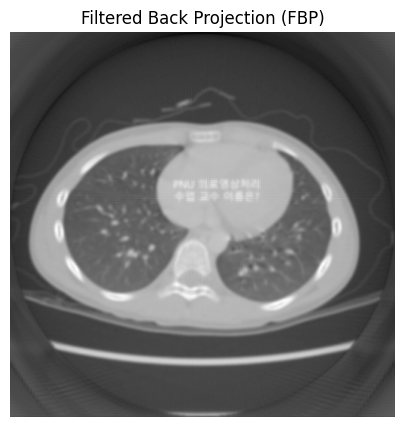

In [20]:
# BP, FBP 실행
bp_image = back_projection(sinogram, angles)
fbp_image = filtered_back_projection_hann(sinogram, angles)

# 시각화
plt.figure(figsize=(12, 5))


plt.imshow(bp_image, cmap='gray')
plt.title('Back Projection (BP)')
plt.axis('off')


plt.imshow(fbp_image, cmap='gray')
plt.title('Filtered Back Projection (FBP)')
plt.axis('off')

plt.show()
